In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.graph_objs as go

In [37]:
train_data = pd.read_csv('../merged_data_without_links.csv')
valid_data = pd.read_csv("../valid/processed_valid.csv")

valid_data['report_date'] = pd.to_datetime(valid_data['report_date'], format='%Y-%m-%d')
valid_data = valid_data.select_dtypes(exclude=['object'])
valid_data = valid_data.fillna(0)

In [38]:
X_valid = valid_data.drop(['target', 'report_date'], axis=1)  # Удаляем целевую переменную и report_date
y_valid = valid_data['target'] # Берем только целевую переменную
X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.3, random_state=0)

c:\Users\Виктор\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



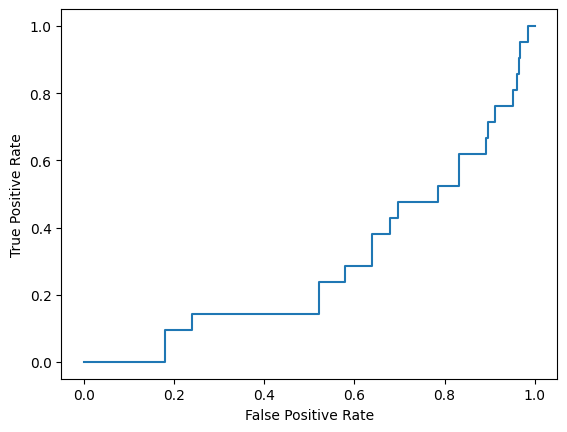

AUC: 0.292


In [39]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

# предсказание вероятностей
y_pred_proba = log_regression.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)

In [40]:
trace = go.Scatter(x=tpr, y=fpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()